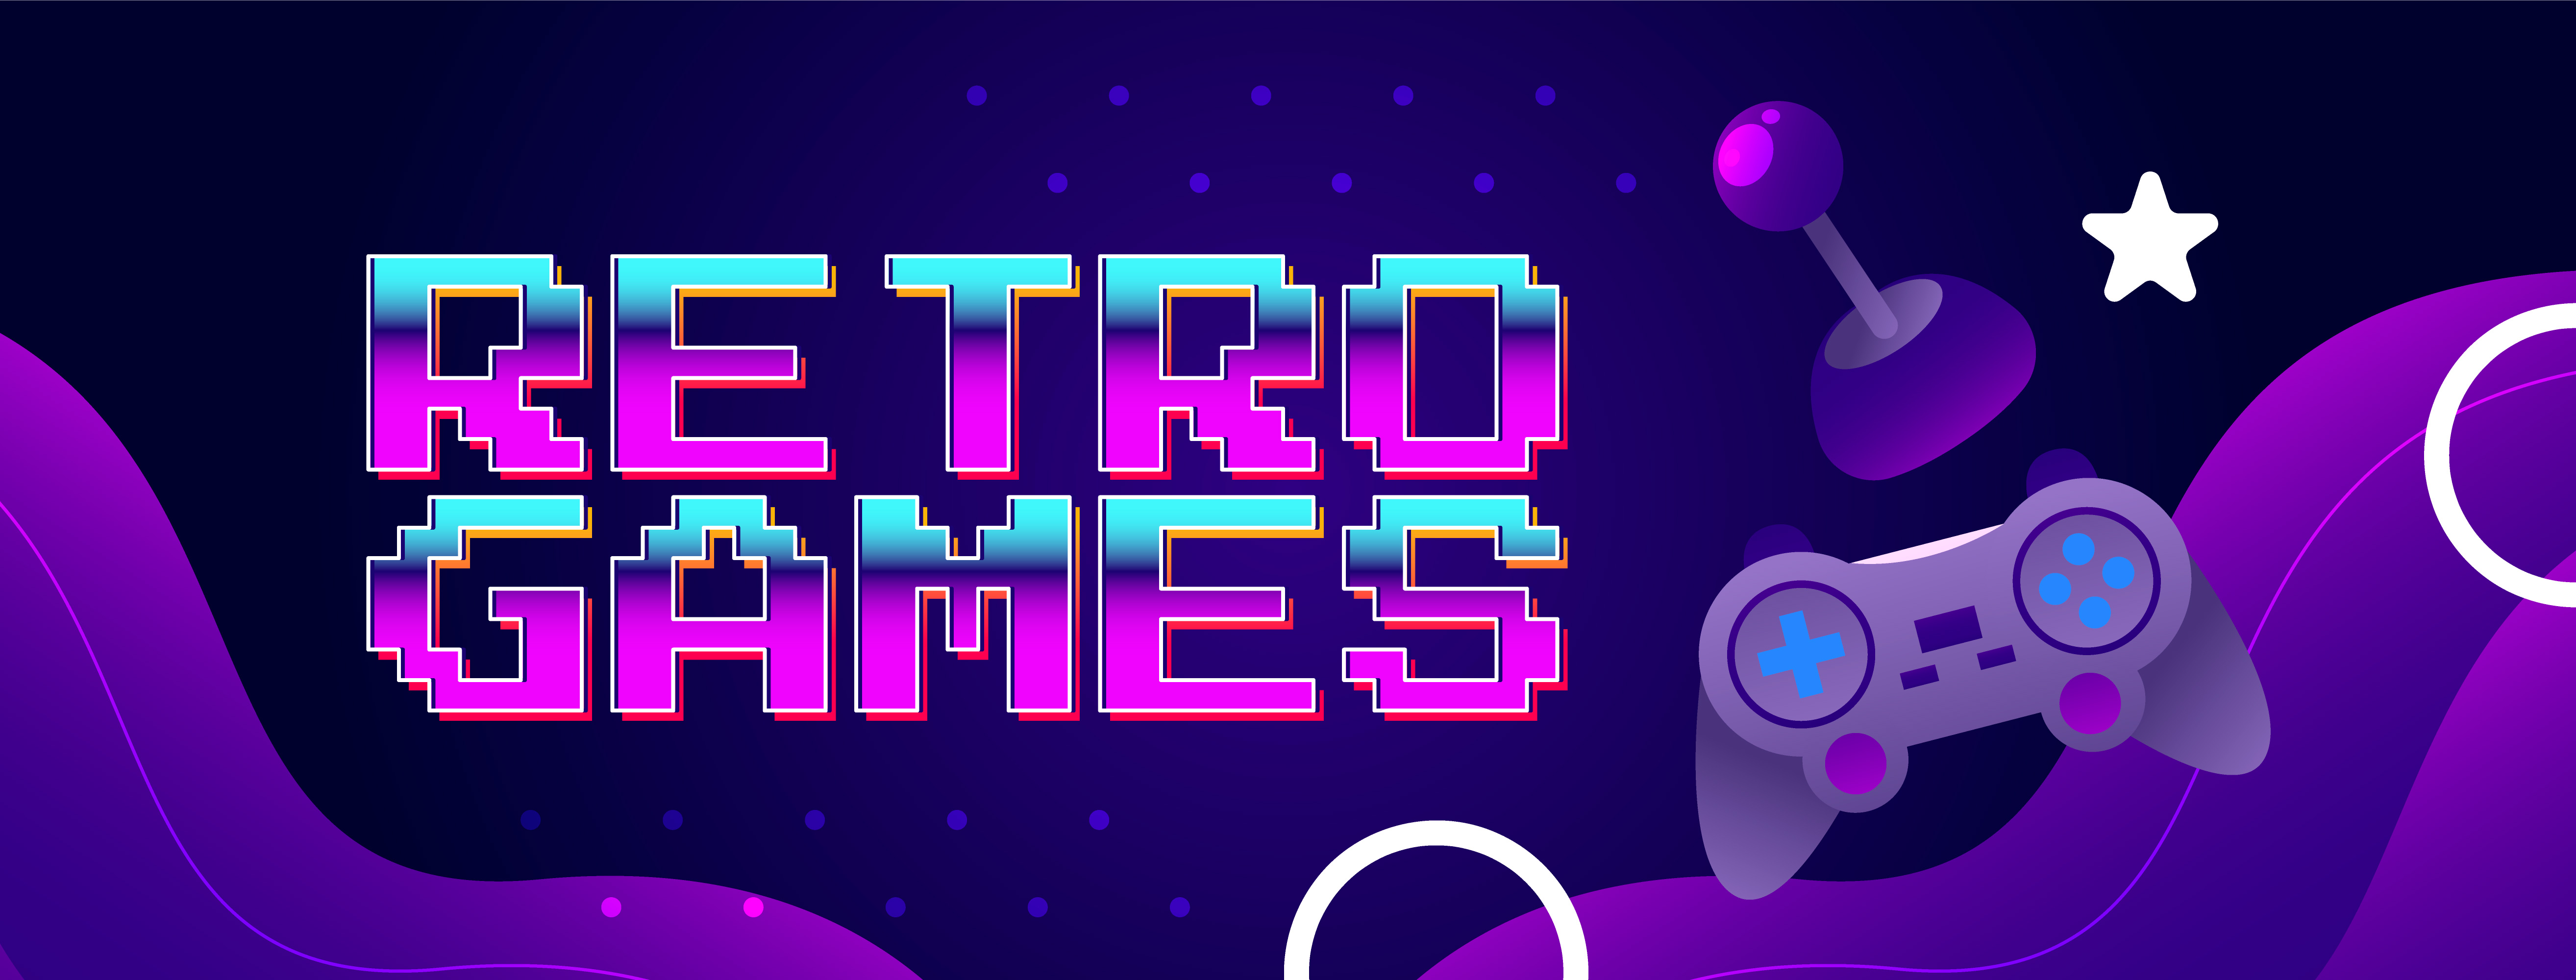
The objective of this article is to enhance the gameplay of selected Atari games through the utilization of reinforcement learning techniques. A reinforcement learning agent will be developed to learn from its interactions with the game environment and make optimal decisions on actions to take to maximize the game score. Through the application of reinforcement learning algorithms, the performance of the games is expected to improve, resulting in higher scores and more consistent gameplay.

The main focus of this article will be on three specific Atari games, which are:

* CartPole
* SpaceInvaders
* Pacman

**About Atari Games**

Atari games refer to a collection of classic video games developed by Atari Inc. during the 1970s and 1980s. These games were originally designed for arcade machines and home gaming consoles, and have since become iconic in the history of video gaming. Atari games are known for their simple yet addictive gameplay, colorful graphics, and nostalgic appeal. Many Atari games are still popular today and are considered classics in the gaming industry. These games provide a rich and challenging environment for developing and testing various artificial intelligence (AI) and machine learning algorithms, making them a popular choice for research and experimentation in the field of AI and reinforcement learning.



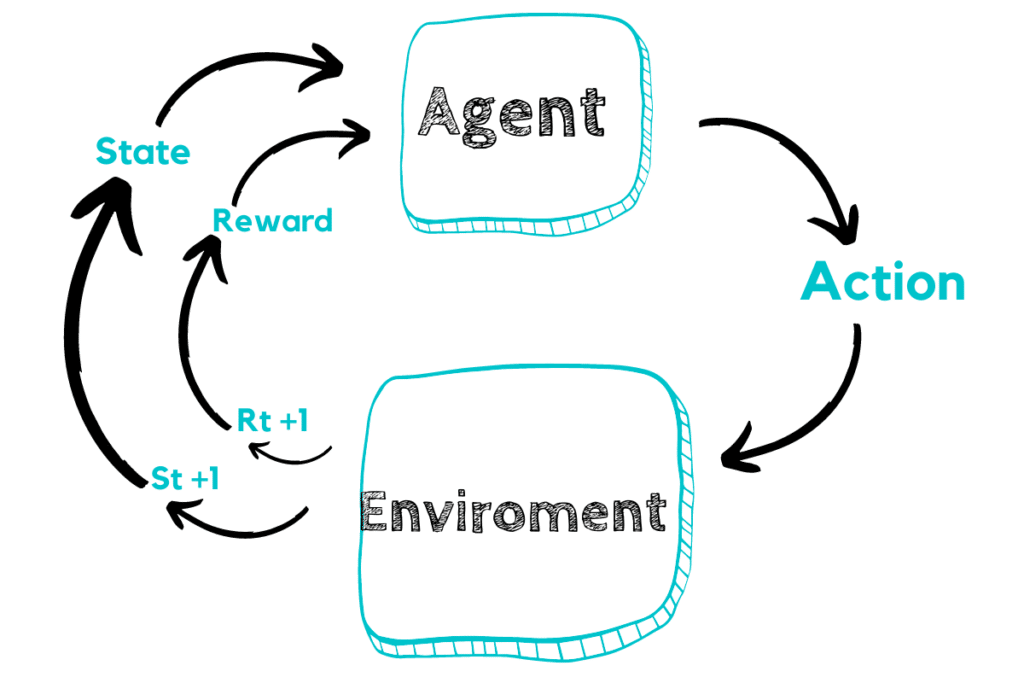

## Installing Necessary Libraries

In [2]:
!pip install gym[atari,accept-rom-license]==0.21.0
!pip install tensorflow
!pip install --upgrade gym==0.19.0
!pip install gym[atari]
# !pip install keras==2.11.0
!pip install keras
!pip install keras-rl2
!pip install gym[classic_control]
!pip install gym[accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py

## Importing Libraries for the project

In [3]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

import random
import numpy as np


import matplotlib.pyplot as plt

import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers.legacy import Adam

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam


import warnings
warnings.filterwarnings('ignore')

# Working with CartPole Environment

In [4]:
# instantiating the CartPole environment
env = gym.make('CartPole-v0')
observation_space = env.observation_space.shape
actions = env.action_space.n

Initially, I will play the game using randomly generated actions to assess the performance of the reinforcement agent. I will conduct this evaluation over 30 separate episodes to observe the outcomes and determine if the agent has performed effectively or not.

In [26]:
scores = []
episodes = 30
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    step = 0
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scores.append(score)

Episode:1 Score:22.0
Episode:2 Score:38.0
Episode:3 Score:17.0
Episode:4 Score:24.0
Episode:5 Score:14.0
Episode:6 Score:13.0
Episode:7 Score:13.0
Episode:8 Score:28.0
Episode:9 Score:45.0
Episode:10 Score:16.0
Episode:11 Score:14.0
Episode:12 Score:16.0
Episode:13 Score:22.0
Episode:14 Score:29.0
Episode:15 Score:26.0
Episode:16 Score:20.0
Episode:17 Score:13.0
Episode:18 Score:24.0
Episode:19 Score:15.0
Episode:20 Score:14.0
Episode:21 Score:11.0
Episode:22 Score:52.0
Episode:23 Score:20.0
Episode:24 Score:53.0
Episode:25 Score:17.0
Episode:26 Score:17.0
Episode:27 Score:16.0
Episode:28 Score:16.0
Episode:29 Score:48.0
Episode:30 Score:16.0


The results of the Cartpole game played with random actions show a wide variation in scores, ranging from 10 to 44, with an average score of around 20-25. However, there are also episodes with lower scores, indicating that random actions are not leading to consistent and high-performing gameplay. This underscores the need for a **reinforcement agent** to optimize actions and improve overall performance.

In [5]:
# defining the nueral network model for prediction
model = Sequential()
model.add(Flatten(input_shape=(1, 4)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=actions, activation='linear'))



In [6]:
# making a function for creating an agent
def MakeAgent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    agent = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return agent


In [7]:
# creating an agent instance
agent = MakeAgent(model, actions)

In [8]:
agent.compile(tf.keras.optimizers.legacy.Adam(learning_rate=1e-3), metrics=['mae'])
agent.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 102s 10ms/step - reward: 1.0000
102 episodes - episode_reward: 97.549 [9.000, 200.000] - loss: 1.423 - mae: 18.105 - mean_q: 36.921

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 95s 9ms/step - reward: 1.0000
58 episodes - episode_reward: 172.638 [45.000, 200.000] - loss: 4.218 - mae: 34.498 - mean_q: 70.026

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: 1.0000
50 episodes - episode_reward: 197.320 [135.000, 200.000] - loss: 6.864 - mae: 38.833 - mean_q: 78.910

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 95s 10ms/step - reward: 1.0000
52 episodes - episode_reward: 192.654 [83.000, 200.000] - loss: 8.360 - mae: 40.162 - mean_q: 81.744

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 101s 10ms/step - reward: 1.0000
d

In [9]:
# checking the score for 30 diffent episodes to evaluate the performance of the agent
scores = agent.test(env, nb_episodes=30, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 30 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 2

The testing result shows that the trained Cartpole agent performs very well in the testing phase. It consistently achieves the maximum possible reward of 200 in all 30 episodes, and takes the optimal number of steps (200) to complete each episode. This indicates that the agent has learned an effective policy for balancing the pole on the cart and maintaining a high score throughout the episodes. The testing result suggests that the trained agent is capable of successfully navigating the Cartpole environment and achieving the desired goal of balancing the pole for extended periods of time without falling, which indicates a successful training process

## Working with SpaceInvaders Environment

We will first declare the environment in which to work it and then check out the avialable actions in the environment so we know what to feed into our neural network

> Indented block



In [ ]:
env = gym.make('SpaceInvaders-v0', render_mode='human')
height, width, channels = env.observation_space.shape
actions = env.action_space.n
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

**I randomly selected actions in order to play the game 20 times and see how many points I could score with random gameplay.**

In [ ]:
scores = []
episodes = 20
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        # env.render()
        action = random.choice([0,1,2,3,4,5])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scores.append(score)
# env.close()


Episode:1 Score:385.0
Episode:2 Score:135.0
Episode:3 Score:135.0
Episode:4 Score:55.0
Episode:5 Score:125.0
Episode:6 Score:410.0
Episode:7 Score:155.0
Episode:8 Score:160.0
Episode:9 Score:135.0
Episode:10 Score:355.0
Episode:11 Score:45.0
Episode:12 Score:105.0
Episode:13 Score:125.0
Episode:14 Score:55.0
Episode:15 Score:45.0
Episode:16 Score:120.0
Episode:17 Score:80.0
Episode:18 Score:60.0
Episode:19 Score:180.0
Episode:20 Score:180.0


In [ ]:
# printing the maximum score from the above scores
print(max(scores))

410.0


The maximum score gotten by playing the game using random action is 410. this score can be improved by introducing Reinforcement Learning Techniques

**creating a function that will be used to create the model for playing the game**

First, I will create a function for preparing the nueral network which I would use for training. This function will take in the dimension of the environment(height and widht), channnels and the actions that can be performed by the agent

In [11]:
def PrepareModel(height, width, channels, actions):
  # Define the CNN model
  model = Sequential()
  model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=(3, height, width, channels)))
  model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(actions, activation='linear'))

  # return model
  return model


In [ ]:
# creating the model
model = PrepareModel(height, width, channels, actions)

In [ ]:
# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 51, 39, 32)     6176      
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 24, 18, 64)     32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 22, 16, 64)     36928     
                                                                 
 flatten (Flatten)           (None, 67584)             0         
                                                                 
 dense (Dense)               (None, 512)               34603520  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 6)                 1

**Creating a function that will initialize the playing agent**

In [10]:
def MakeAgent(model, actions):
    agent = DQNAgent(model = model,
                 memory = SequentialMemory(limit = 5000, window_length = 3),
                 policy = BoltzmannQPolicy(),
                 nb_actions = actions,
                 nb_steps_warmup = 10,
                 target_model_update = 0.01)
    return agent

In [ ]:
agent = MakeAgent(model, actions)


In [ ]:
# compiling and training the agent to play the game
agent.compile(tf.keras.optimizers.legacy.Adam(learning_rate=1e-4), metrics = ['mae'])
agent.fit(env, nb_steps=1000, visualize=False, verbose=1)
result = agent.test(env, nb_episodes = 20, visualize = False)


Training for 1000 steps ...
Interval 1 (0 steps performed)
 1000/10000 [==>...........................] - ETA: 4:53:00 - reward: 0.2550done, took 1951.702 seconds
Testing for 20 episodes ...
Episode 1: reward: 35.000, steps: 399
Episode 2: reward: 275.000, steps: 1261
Episode 3: reward: 130.000, steps: 693
Episode 4: reward: 25.000, steps: 506
Episode 5: reward: 125.000, steps: 635
Episode 6: reward: 175.000, steps: 1140
Episode 7: reward: 160.000, steps: 950
Episode 8: reward: 85.000, steps: 670
Episode 9: reward: 355.000, steps: 1044
Episode 10: reward: 335.000, steps: 878
Episode 11: reward: 60.000, steps: 516
Episode 12: reward: 35.000, steps: 511
Episode 13: reward: 65.000, steps: 521
Episode 14: reward: 175.000, steps: 803
Episode 15: reward: 55.000, steps: 488
Episode 16: reward: 95.000, steps: 670
Episode 17: reward: 340.000, steps: 990
Episode 18: reward: 305.000, steps: 899
Episode 19: reward: 10.000, steps: 386
Episode 20: reward: 30.000, steps: 392


In [ ]:
# checking the maximum score scored by the game agent
score = result.history['nb_steps']
max(score)

1261

**After completing 1000 episodes of training for the agent, it is evident that there has been a significant improvement. The highest score achieved by the agent after training is 1261, which is a significant improvement compared to the initial score of only 410 without any training. This clear improvement in performance clearly demonstrates the effectiveness of the training process.**

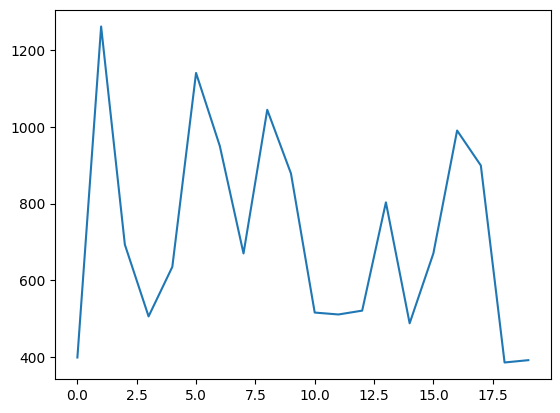

In [ ]:
# making a plot to visualize the score for the 20 different test episodes of the agent
plt.plot(range(20), score)
plt.rcParams["figure.figsize"] = (27,8)
plt.show()

## Working with PacMan Game Environment

In this game, I will be following the same process I used for the space Invaders as they have very similar environment space


In [13]:
env = gym.make('MsPacman-v0', render_mode='human')
height, width, channels = env.observation_space.shape
actions = env.action_space.n
env.unwrapped.get_action_meanings()

['NOOP',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT']

**Randomly playing the game through 20 different episodes to see the maximum score I get**

In [ ]:
scores = []
episodes = 20
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        # env.render()
        action = random.choice([0,1,2,3,4,5,6,7,8])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scores.append(score)
# env.close()

Episode:1 Score:120.0
Episode:2 Score:180.0
Episode:3 Score:230.0
Episode:4 Score:210.0
Episode:5 Score:270.0
Episode:6 Score:180.0
Episode:7 Score:170.0
Episode:8 Score:180.0
Episode:9 Score:360.0
Episode:10 Score:200.0
Episode:11 Score:200.0
Episode:12 Score:210.0
Episode:13 Score:250.0
Episode:14 Score:170.0
Episode:15 Score:230.0
Episode:16 Score:170.0
Episode:17 Score:280.0
Episode:18 Score:230.0
Episode:19 Score:250.0
Episode:20 Score:300.0


In [ ]:
# checking the mean score by random playing 
np.mean(scores)

219.5

**We can see that we score an average of 219.5 each time we played the game by using random action, we will try to improve this score using Reinforcement Learning**

**I will be using the same model for PacMan game and see how it performs**

In [14]:
# creating the model
model = PrepareModel(height, width, channels, actions)

# creating the agent
agent = MakeAgent(model, actions)

In [15]:
# compiling and training the agent to play the game
agent.compile(tf.keras.optimizers.legacy.Adam(learning_rate=1e-4), metrics = ['mae'])
agent.fit(env, nb_steps=1000, visualize=False, verbose=1)
# testing the agent over 20 episode
result = agent.test(env, nb_episodes = 20, visualize = False)

Training for 1000 steps ...
Interval 1 (0 steps performed)
 1000/10000 [==>...........................] - ETA: 7:22:37 - reward: 0.3700done, took 2948.254 seconds
Testing for 20 episodes ...
Episode 1: reward: 250.000, steps: 971
Episode 2: reward: 340.000, steps: 677
Episode 3: reward: 270.000, steps: 824
Episode 4: reward: 380.000, steps: 840
Episode 5: reward: 110.000, steps: 818
Episode 6: reward: 210.000, steps: 694
Episode 7: reward: 380.000, steps: 784
Episode 8: reward: 380.000, steps: 826
Episode 9: reward: 240.000, steps: 790
Episode 10: reward: 240.000, steps: 623
Episode 11: reward: 380.000, steps: 847
Episode 12: reward: 400.000, steps: 690
Episode 13: reward: 400.000, steps: 714
Episode 14: reward: 780.000, steps: 1007
Episode 15: reward: 530.000, steps: 758
Episode 16: reward: 380.000, steps: 769
Episode 17: reward: 380.000, steps: 846
Episode 18: reward: 370.000, steps: 875
Episode 19: reward: 350.000, steps: 691
Episode 20: reward: 380.000, steps: 850


In [16]:
# checking the maximum score scored by the game agent
score = result.history['nb_steps']
print(f'Maximum score = {max(score)} and Average score = {np.mean(score)}')

Maximum score = 1007 and Average score = 794.7


**After training the agent for 1000 episodes, similar to the approach used for Space Invaders, notable improvements can be observed. The maximum score has increased from 360 to 1007, and the average score per episode has risen from 219 to 794.7. These results indicate that the agent has learned to play the game more effectively compared to the random actions performed prior to training.**

Although, the performance can be further improved by longer training periods or hyperperameter tunning or possibly use of another nueral network classifier.